# Phase 2 Review

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import scipy.stats as scs
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

### Check Your Data … Quickly
The first thing you want to do when you get a new dataset, is to quickly to verify the contents with the .head() method.

In [ ]:
df = pd.read_csv('movie_metadata.csv')
print(df.shape)
df.head()

(5043, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Question 1

A Hollywood executive wants to know how much an R-rated movie released after 2000 will earn. The data above is a sample of some of the movies with that rating during that timeframe, as well as other movies. How would you go about answering her question? Talk through it theoretically and then do it in code.

What is the 95% confidence interval for a post-2000 R-rated movie's box office gross?

**I would first filter out the irrelevant rows of data, leaving only those with a movie release year after 2000 and a content rating of R.  Once we have that subset, we can find the sample mean (x_bar) and standard deviation (s) in order to some inferences about the population mean. We need to figure out the sample size and confidence level additionally in our calculation of the confidence interval.**


In [ ]:
# do it in code here
data = df[(df.content_rating == 'R') & (df.title_year > 2000)]
x_bar = round(data.gross.mean(), 2)
print("Gross Mean:", x_bar)
s = round(data.gross.std(), 2)
print("Gross Standard Deviation:", s)


Gross Mean: 27648848.44
Gross Standard Deviation: 39088854.94


In [ ]:
# 95% confidence interval
n = round(data.gross.count(), 2)
conf = 0.95
t_value = scs.t.ppf((1+conf)/2, n-1)
margin_error = t_value*(s/np.sqrt(n)) 
confidence_interval = (round(x_bar - margin_error, 2)), (round(x_bar + margin_error, 2))
print("Confidence Interval: ", confidence_interval)


Confidence Interval:  (25442351.71, 29855345.17)


## Question 2a

Your ability to answer the first question has the executive excited and now she has many other questions about the types of movies being made and the differences in those movies budgets and gross amounts.

Read through the questions below and **determine what type of statistical test you should use** for each question and **write down the null and alternative hypothesis for those tests**.

- Is there a relationship between the number of Facebook likes for a cast and the box office gross of the movie?
- Do foreign films perform differently at the box office than non-foreign films?
- Of all movies created are 40% rated R?
- Is there a relationship between the language of a film and the content rating (G, PG, PG-13, R) of that film?
- Is there a relationship between the content rating of a film and its budget? 

#### Is there a relationship between the number of Facebook likes for a cast and the box office gross of the movie?

- Two continuous variables (# of FB likes, gross)
- Statistical Test:  Relationship between two variables, Pearson correlation or Linear Regression
- $H_o$:  The two variables are unrelated.
- $H_a$:  The two variables are related.


#### Do foreign films perform differently at the box office than non-foreign films?

- One independent categorical variable with 2 levels (film type) and one continuous variable (gross)
- Statistical Test: Difference of two means -> Two-sample T-Test
- $H_o$: $\mu_1 = \mu_2$
- $H_a$: $\mu_1 \neq \mu_2$


#### Of all movies created are 40% rated R?

- One categorical variable (film rating)
- Statistical Test: Comparing sample with population proportion -> One-sample Z-test assuming n >= 30
- $H_o$: $\hat{p} = p_o$
- $H_a$: $\hat{p} \neq p_o$

#### Is there a relationship between the language of a film and the content rating (G, PG, PG-13, R) of that film?

- Two categorical variables (plot keywords and film ratings)
- Statistical Test: Relationship between two categorical variables, Chi-squared Test
- $H_0$:  The two variables are unrelated.
- $H_a$:  Two variables are related.



#### Is there a relationship between the content rating of a film and its budget? 

- One categorical variable (content rating) and one continuous variable (budget)
- Statistical Test:  Variance between multiple means, One-way ANOVA
- $H_o$: $\mu_1 = \mu_2 = \mu_3$
- $H_a$: $\mu_1 \neq \mu_2 \text{ or } \mu_2 \neq \mu_3 \text{ or } \mu_1 \neq \mu_3$

## Question 2b

Calculate the answer for the second question:

- Do foreign films perform differently at the box office than non-foreign films?

- One independent categorical variable with 2 levels (film type) and one continuous variable (gross)
- Statistical Test: Difference of two means, Two-sample T-Test
- $H_o$: $\mu_1 = \mu_2$
- $H_a$: $\mu_1 \neq \mu_2$

In [ ]:
# your answer here
foreign = data[data.country != 'USA'].gross.dropna()
domestic = data[data.country == 'USA'].gross.dropna()
for_var = np.var(foreign)
dom_var = np.var(domestic)
print("Ratio of Variances:", for_var/dom_var)

Ratio of Variances: 0.32165120167319516


In [ ]:
n_1 = len(foreign)
n_2 = len(domestic)
s_1 = np.std(foreign)
s_2 = np.std(domestic)
pooled_sd = np.sqrt((((n_1-1)*(s_1)**2)+((n_2-1)*(s_2)**2))/(n_1+n_2-2))
x_bar_1 = np.mean(foreign)
x_bar_2 = np.mean(domestic)
t_stat = (x_bar_1 - x_bar_2)/((pooled_sd)*(np.sqrt((1/n_1)+(1/n_2)))) #statsmodel t-test
print("T-statistic:", t_stat)
t_crit = scs.t.ppf(1 - 0.025, df=n_1+n_2-2)
print("T-critical:", t_crit)
p_value = scs.t.sf(np.abs(t_stat), n_1+n_2-2)*2 # two-sided p-value
print("P-value:", p_value)
# look at co_nfidence level also

T-statistic: -7.737149642655255
T-critical: 1.9619329840166393
P-value: 2.1378041722801452e-14


**We reject the null hypothesis since the T-statistic is less than the negative of the T-critical value. We can say that there is a difference between the means of the two sample populations, and the films do perform differently at the box office.**


## Question 3

Now that you have answered all of those questions, the executive wants you to create a model that predicts the money a movie will make if it is released next year in the US. She wants to use this to evaluate different scripts and then decide which one has the largest revenue potential. 

Below is a list of potential features you could use in the model. Create a new frame containing only those variables.

Would you use all of these features in the model?

Identify which features you might drop and why.

*Remember you want to be able to use this model to predict the box office gross of a film **before** anyone has seen it.*

- **budget**: The amount of money spent to make the movie
- **title_year**: The year the movie first came out in the box office
- **years_old**: How long has it been since the movie was released
- **genre**: Each movie is assigned one genre category like action, horror, comedy
- **avg_user_rating**: This rating is taken from Rotten tomatoes, and is the average rating given to the movie by the audience
- **actor_1_facebook_likes**: The number of likes that the most popular actor in the movie has
- **cast_total_facebook_likes**: The sum of likes for the three most popular actors in the movie
- **language**: the original spoken language of the film


In [ ]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


### Data Cleaning

In [ ]:
df.content_rating.value_counts()

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
X              13
TV-PG          13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y7           1
TV-Y            1
Name: content_rating, dtype: int64

In [ ]:
df.drop(df.index[df['content_rating'].isin(['TV-MA', 'TV-14', 'TV-PG', 'TV-G', 'NC-17', 'GP', 'M', 'TV-Y7', 'TV-Y', 'X'])], inplace = True)

In [ ]:
unrated = ['Unrated', 'Not Rated', 'Approved', 'Passed', np.nan]
rated = ['R', 'PG-13', 'PG', 'G']
unrated_dict = dict.fromkeys(unrated, 'unrated')
rated_dict = dict(zip(rated, rated))
ratings_map = {**rated_dict,**unrated_dict}
df['rating'] = df['content_rating'].map(ratings_map)

In [ ]:
df['rating'].value_counts()

R          2118
PG-13      1461
PG          701
unrated     545
G           112
Name: rating, dtype: int64

In [ ]:
df['genres'] = df['genres'].apply(lambda x: x.split('|'))

In [ ]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,rating
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,"[Action, Adventure, Fantasy, Sci-Fi]",CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,PG-13
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,"[Action, Adventure, Fantasy]",Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,PG-13
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,"[Action, Adventure, Thriller]",Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,PG-13
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,"[Action, Thriller]",Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,PG-13
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,[Documentary],Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,unrated


In [ ]:
df.rename(columns={'director_facebook_likes': 'dir_fb_likes', 'movie_facebook_likes': 'mov_fb_likes', 'cast_total_facebook_likes': 'cast_fb_likes', 'actor_1_facebook_likes': 'act1_fb_likes', 'actor_3_facebook_likes': 'act3_fb_likes', 'actor_2_facebook_likes': 'act2_fb_likes', 'num_critic_for_reviews': 'num_crit_rev', 'num_user_for_reviews': 'num_user_rev'}, inplace=True)
df.head()

,color,director_name,num_crit_rev,duration,dir_fb_likes,act3_fb_likes,actor_2_name,act1_fb_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_fb_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_rev,language,country,content_rating,budget,title_year,act2_fb_likes,imdb_score,aspect_ratio,mov_fb_likes,rating
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,"[Action, Adventure, Fantasy, Sci-Fi]",CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,PG-13
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,"[Action, Adventure, Fantasy]",Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,PG-13
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,"[Action, Adventure, Thriller]",Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,PG-13
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,"[Action, Thriller]",Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,PG-13
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,[Documentary],Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,unrated


In [ ]:
genres = df.genres
genres = pd.DataFrame(df.genres.values.tolist()).add_prefix('genre_')
df = pd.concat([df, genres], axis=1)
df.drop(columns=['genre_3','genre_4', 'genre_5', 'genre_6', 'genre_7'], inplace=True)
df['years_old'] = 2021 - df['title_year']

In [ ]:
df.head()

,color,director_name,num_crit_rev,duration,dir_fb_likes,act3_fb_likes,actor_2_name,act1_fb_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_fb_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_rev,language,country,content_rating,budget,title_year,act2_fb_likes,imdb_score,aspect_ratio,mov_fb_likes,rating,genre_0,genre_1,genre_2,years_old
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,"[Action, Adventure, Fantasy, Sci-Fi]",CCH Pounder,Avatar,886204.0,4834.0,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,PG-13,Action,Adventure,Fantasy,12.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,"[Action, Adventure, Fantasy]",Johnny Depp,Pirates of the Caribbean: At World's End,471220.0,48350.0,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,PG-13,Action,Adventure,Fantasy,14.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,"[Action, Adventure, Thriller]",Christoph Waltz,Spectre,275868.0,11700.0,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,PG-13,Action,Adventure,Thriller,6.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,"[Action, Thriller]",Tom Hardy,The Dark Knight Rises,1144337.0,106759.0,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,PG-13,Action,Thriller,None,9.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,[Documentary],Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8.0,143.0,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0.0,unrated,Documentary,None,None,NaN


In [ ]:
df2 = df[['gross', 'budget', 'years_old', 'genre_0', 'imdb_score', 'act1_fb_likes', 'cast_fb_likes', 'language', 'rating']]

In [ ]:
df2.head()

,gross,budget,years_old,genre_0,imdb_score,act1_fb_likes,cast_fb_likes,language,rating
0,760505847.0,237000000.0,12.0,Action,7.9,1000.0,4834.0,English,PG-13
1,309404152.0,300000000.0,14.0,Action,7.1,40000.0,48350.0,English,PG-13
2,200074175.0,245000000.0,6.0,Action,6.8,11000.0,11700.0,English,PG-13
3,448130642.0,250000000.0,9.0,Action,8.5,27000.0,106759.0,English,PG-13
4,NaN,NaN,NaN,Documentary,7.1,131.0,143.0,NaN,unrated


In [ ]:
df2.dtypes

gross            float64
budget           float64
years_old        float64
genre_0           object
imdb_score       float64
act1_fb_likes    float64
cast_fb_likes    float64
language          object
rating            object
dtype: object

### Handling Missing Values

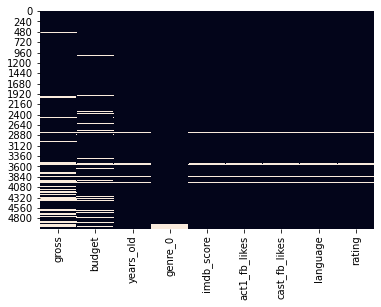

In [ ]:
sns.heatmap(df2.isna(), cbar=False)
plt.savefig('heatmap.png')

In [ ]:
df2 = df2.dropna(subset=['gross'])

In [ ]:
df2.shape

(4138, 9)

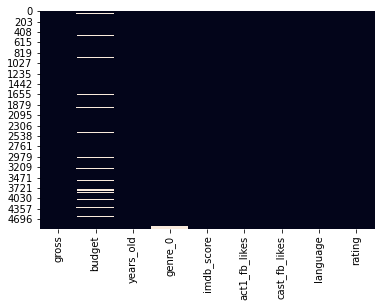

In [ ]:
sns.heatmap(df2.isna(), cbar=False)
plt.savefig('heatmap2.png')

In [ ]:
budget_ratings = df2.groupby('rating')['budget'].mean().round(1).to_dict()
budget_ratings

{'G': 50911615.4,
 'PG': 53575683.2,
 'PG-13': 55784951.6,
 'R': 36998505.3,
 'unrated': 13093854.0}

In [ ]:
df2['budget'] = df2['budget'].fillna(df2['rating'].map(budget_ratings))

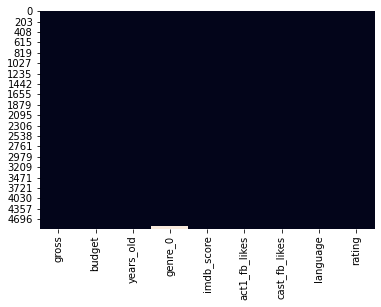

In [ ]:
sns.heatmap(df2.isnull(), cbar=False)
plt.savefig('heatmap3.png')

In [ ]:
df2.reset_index(drop=True, inplace=True)

In [ ]:
df2

,gross,budget,years_old,genre_0,imdb_score,act1_fb_likes,cast_fb_likes,language,rating
0,760505847.0,237000000.0,12.0,Action,7.9,1000.0,4834.0,English,PG-13
1,309404152.0,300000000.0,14.0,Action,7.1,40000.0,48350.0,English,PG-13
2,200074175.0,245000000.0,6.0,Action,6.8,11000.0,11700.0,English,PG-13
3,448130642.0,250000000.0,9.0,Action,8.5,27000.0,106759.0,English,PG-13
4,73058679.0,263700000.0,9.0,Action,6.6,640.0,1873.0,English,PG-13
...,...,...,...,...,...,...,...,...,...
4133,70071.0,7000.0,16.0,NaN,6.3,0.0,0.0,English,unrated
4134,2040920.0,7000.0,29.0,NaN,6.9,121.0,147.0,Spanish,R
4135,4584.0,9000.0,10.0,NaN,6.4,296.0,690.0,English,unrated
4136,10443.0,55784951.6,9.0,NaN,6.3,946.0,2386.0,English,PG-13


### Handling Outliers

In [ ]:
above_3std = df2.gross.mean() + (3*df2.gross.std())
above_3std

254338224.1324159

In [ ]:
df2 = df2[(df2.gross<=above_3std)&(df2.gross>1000000)]

In [ ]:
df2.shape

(3470, 9)

In [ ]:
above_3std = df2.budget.mean() + (3*df2.budget.std())
above_3std

690700221.0921279

In [ ]:
df2 = df2[(df2.budget<=above_3std)&(df2.budget>1000000)]

In [ ]:
df2.shape

(3364, 9)

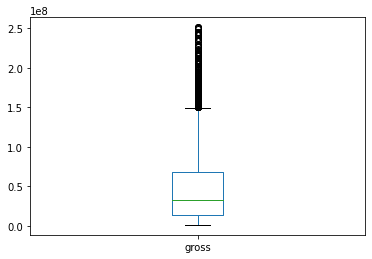

In [ ]:
df2['gross'].plot(kind='box')
plt.savefig('gross_boxplot.png')

### Feature Selection

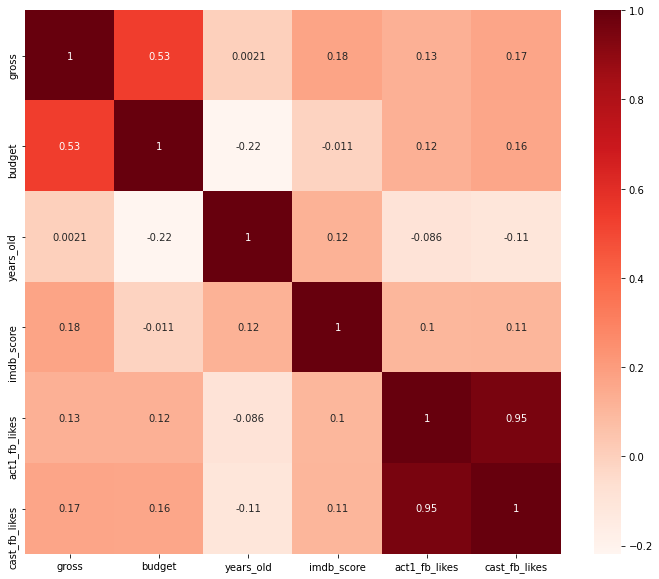

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
plt.savefig('corrmap.png')

In [ ]:
model = ols(formula='gross~budget', data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     1343.
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          9.72e-248
Time:                        10:11:35   Log-Likelihood:                -63847.
No. Observations:                3364   AIC:                         1.277e+05
Df Residuals:                    3362   BIC:                         1.277e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.236e+07   1.04e+06     21.554      0.000    2.03e+07    2.44e+07
budget         0.6673      0.018     36.652      0.000       0.632       0.703
==============================================================================
Omnibus:                      822.253   Durbin-Watson:                   1.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5393.888
Skew:                           0.996   Prob(JB):                         0.00
Kurtosis:                       8.875   Cond. No.                     8.10e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.1e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

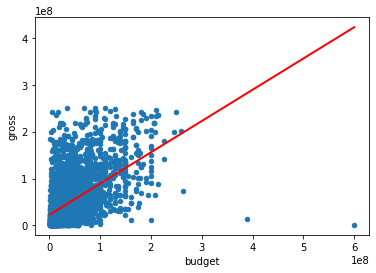

In [ ]:
X_new = pd.DataFrame({'budget': [df2.budget.min(), df2.budget.max()]})
preds = model.predict(X_new)
df2.plot(kind='scatter', x='budget', y='gross')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()
plt.savefig('gross_budget_scatter.png')

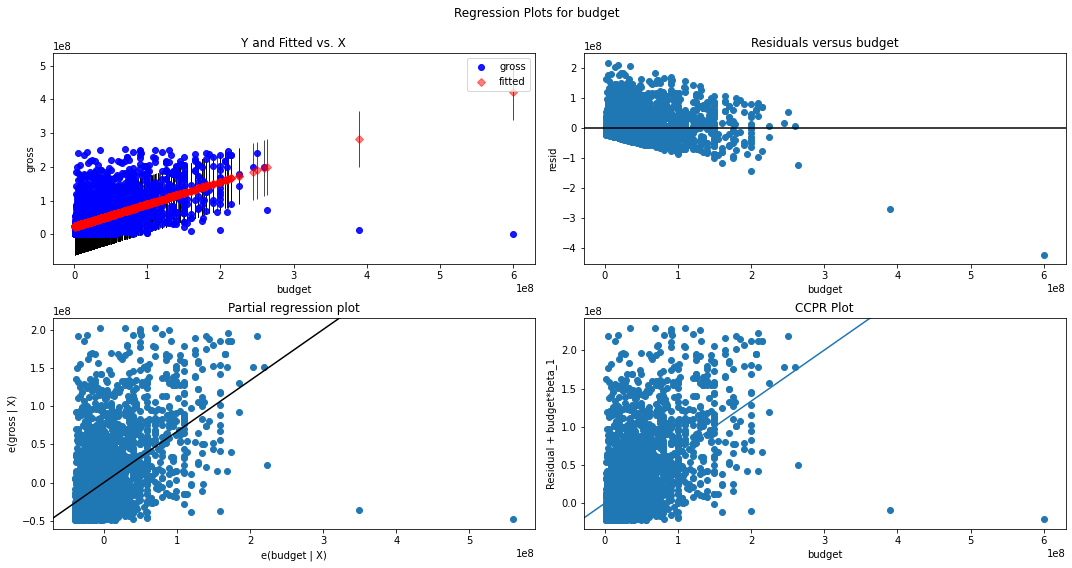

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'budget', fig=fig)
plt.show()
plt.savefig('budget_regression_plots.png')

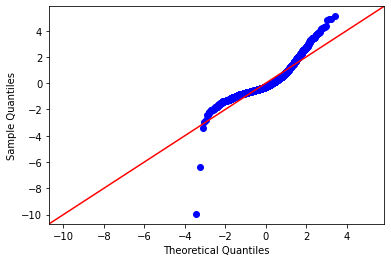

In [ ]:
#Q-Q plot for normality check

import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [ ]:
df2.describe()

,gross,budget,years_old,imdb_score,act1_fb_likes,cast_fb_likes,log_gross,log_budget,log_act1_fb,log_cast_fb,log_score,log_years_old,recip_gross,sqrt_gross
count,3.364000e+03,3.364000e+03,3364.000000,3364.000000,3364.000000,3364.00000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3.364000e+03,3364.000000
mean,4.939170e+07,4.050710e+07,17.714625,6.431243,7815.939358,11507.00327,17.124503,17.067562,7.845276,8.546296,1.845312,2.748967,8.696817e-08,6185.192461
std,5.006370e+07,4.008784e+07,9.339725,1.057748,15421.387195,18677.06208,1.233479,1.024482,1.654510,1.405176,0.187216,0.505535,1.537517e-07,3337.425677
min,1.007535e+06,1.100000e+06,5.000000,1.600000,0.000000,0.00000,13.823017,13.910821,0.000000,0.000000,0.470004,1.609438,3.976117e-09,1003.760430
25%,1.304922e+07,1.400000e+07,11.000000,5.800000,788.750000,2072.50000,16.384239,16.454568,6.670449,7.636511,1.757858,2.397895,1.477560e-08,3612.370418
50%,3.304305e+07,3.000000e+07,16.000000,6.500000,1000.000000,4288.50000,17.313322,17.216708,6.907755,8.363692,1.871802,2.772589,3.026355e-08,5748.308733
75%,6.767926e+07,5.500000e+07,22.000000,7.200000,13000.000000,16454.25000,18.030290,17.822844,9.472705,9.708339,1.974081,3.091042,7.663295e-08,8226.739049
max,2.515016e+08,6.000000e+08,84.000000,9.300000,640000.000000,656730.00000,19.342960,20.212440,13.369223,13.395028,2.230014,4.430817,9.925214e-07,15858.803391


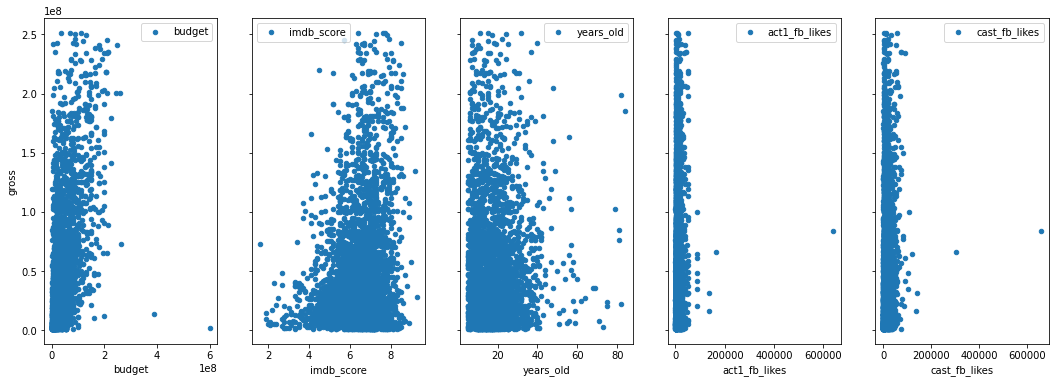

In [ ]:
#testing for linearity assumption
fig, axs= plt.subplots(1,5, sharey=True, figsize=(18,6))
for idx, channel in enumerate(['budget', 'imdb_score', 'years_old', 'act1_fb_likes', 'cast_fb_likes']):
    df2.plot(kind='scatter', x=channel, y='gross', ax=axs[idx], label=channel)
plt.legend()
plt.show()

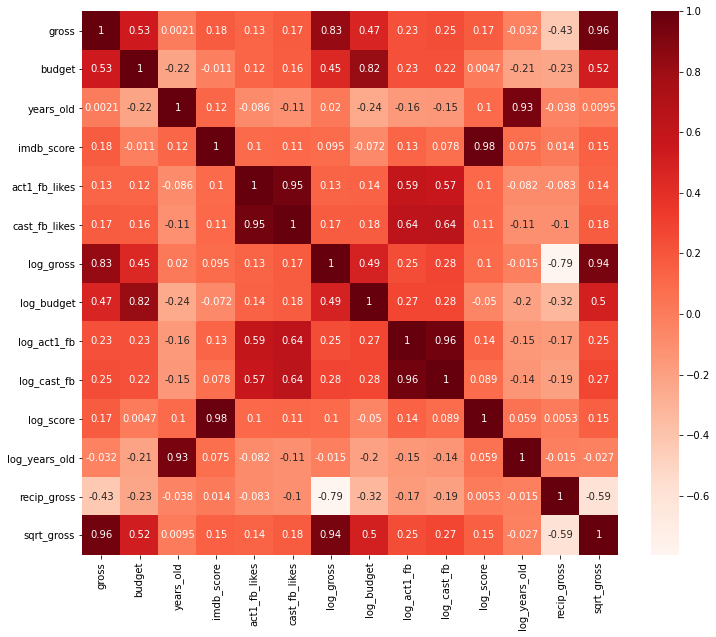

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
df2 = df2.drop(columns=['cast_fb_likes'])

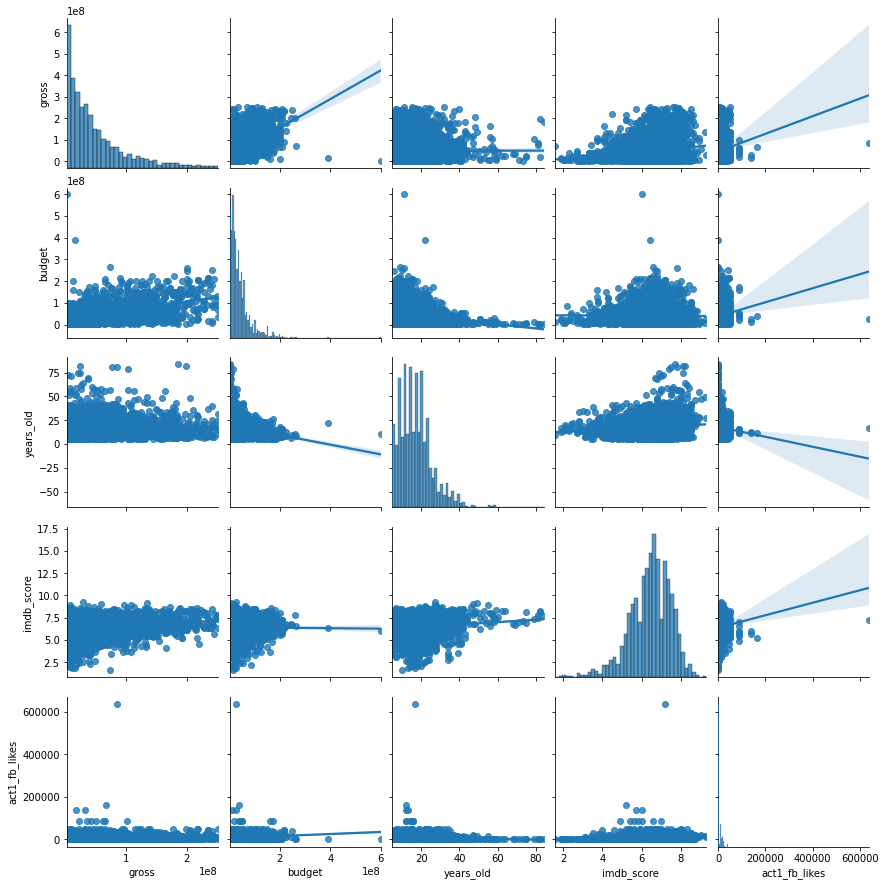

In [ ]:
sns.pairplot(df2, kind='reg')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9cca2de908>,
      dtype=object)

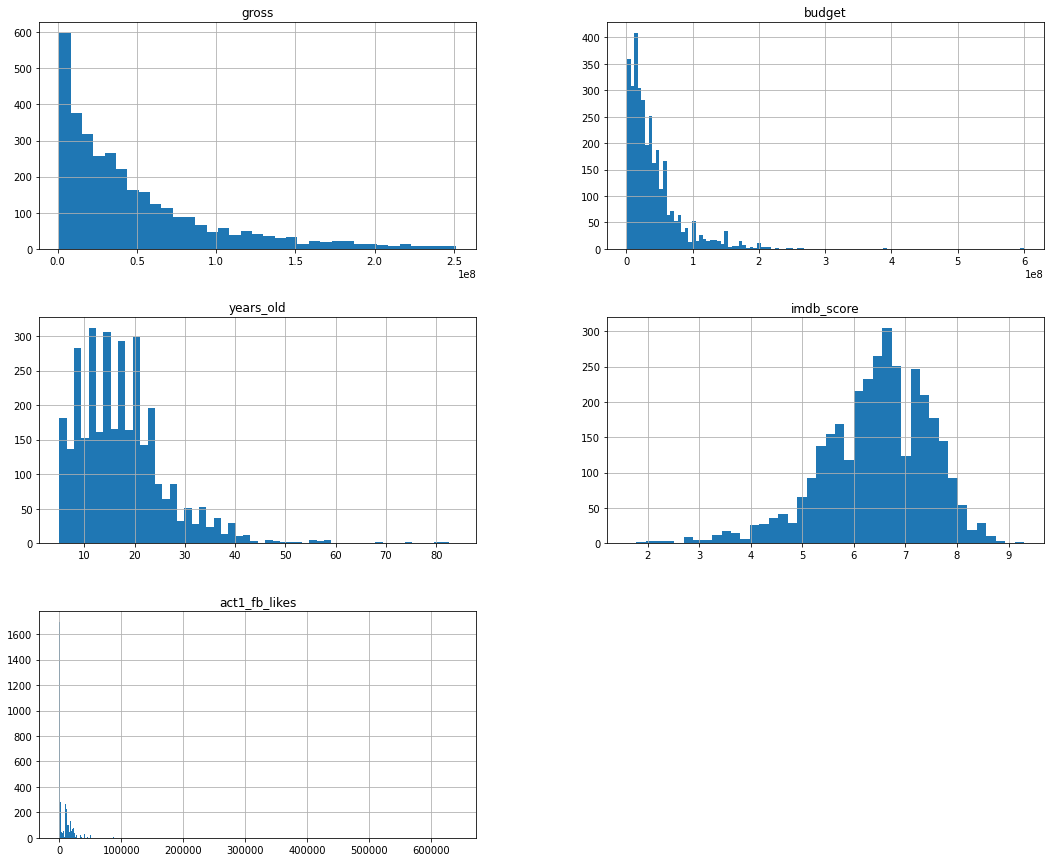

In [ ]:
df2.hist(figsize=(18,15), bins='auto')

In [ ]:
# Run a simple OLS regression between indepedent and dependent variables
# Plot the residuals using sm.graphics.plot_regress_exog()
# Plot a Q-Q plot for regression residuals normality test
results=[]
f = f'gross~{column}'
for idx, column in enumerate(data.columns):
    model = smf.ols(formula=f, data=df2).fit()

    fig,axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()

    # Store following values in array for each iteration: independent variable, r_squared, intercept, slope, p-value, normality (JB)
    results.append([column, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])

PatsyError: ignored

In [ ]:
pd.DataFrame(results, coluns=['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)'])

In [ ]:
# Your code here 
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16,15))

for xcol, ax in zip(['genres', 'rating'], axes):
    df2.plot(kind='scatter', x=xcol, y='gross', ax=ax, alpha=0.4, color='b')
    ax.set_title(f'Gross vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Gross in $1,000,000')
fig.tight_layout()

In [ ]:
df3 = df2.copy()

In [ ]:
df2.head()

,level_0,index,gross,budget,years_old,genre_0,imdb_score,act1_fb_likes,language,rating,log_gross,log_budget,log_act1_fb,log_score,log_years_old,recip_gross,sqrt_gross
0,0,2,200074175.0,245000000.0,6.0,Action,6.8,11000.0,English,PG-13,19.114199,19.316769,9.305651,1.916923,1.791759,4.998146e-09,14144.757863
1,1,4,73058679.0,263700000.0,9.0,Action,6.6,640.0,English,PG-13,18.106773,19.390323,6.461468,1.887070,2.197225,1.368763e-08,8547.436984
2,2,6,200807262.0,260000000.0,11.0,Adventure,7.8,799.0,English,PG,19.117856,19.376192,6.683361,2.054124,2.397895,4.979900e-09,14170.647903
3,3,10,200069408.0,209000000.0,15.0,Action,6.1,18000.0,English,PG-13,19.114175,19.157845,9.798127,1.808289,2.708050,4.998265e-09,14144.589354
4,4,11,168368427.0,200000000.0,13.0,Action,6.7,451.0,English,PG-13,18.941665,19.113828,6.111467,1.902108,2.564949,5.939356e-09,12975.685993


In [ ]:
#exponential model
df3['log_gross'] = np.log(df3.gross)
#logarithmic model
df3['log_budget'] = np.log(df3.budget)
df3['log_act1_fb'] = df3.act1_fb_likes.apply(lambda x: np.log(x) if x > 0 else 0)
df3['log_score'] = np.log(df3.imdb_score)
df3['log_years_old'] = np.log(df3.years_old)
#reciprocal model
df3['recip_gross'] = 1/df3.gross
#quadratic model
df3['sqrt_gross'] = np.sqrt(df3.gross)
#power model (log(x), log(y))
df3.head()

,level_0,index,gross,budget,years_old,genre_0,imdb_score,act1_fb_likes,language,rating,log_gross,log_budget,log_act1_fb,log_score,log_years_old,recip_gross,sqrt_gross
0,0,2,200074175.0,245000000.0,6.0,Action,6.8,11000.0,English,PG-13,19.114199,19.316769,9.305651,1.916923,1.791759,4.998146e-09,14144.757863
1,1,4,73058679.0,263700000.0,9.0,Action,6.6,640.0,English,PG-13,18.106773,19.390323,6.461468,1.887070,2.197225,1.368763e-08,8547.436984
2,2,6,200807262.0,260000000.0,11.0,Adventure,7.8,799.0,English,PG,19.117856,19.376192,6.683361,2.054124,2.397895,4.979900e-09,14170.647903
3,3,10,200069408.0,209000000.0,15.0,Action,6.1,18000.0,English,PG-13,19.114175,19.157845,9.798127,1.808289,2.708050,4.998265e-09,14144.589354
4,4,11,168368427.0,200000000.0,13.0,Action,6.7,451.0,English,PG-13,18.941665,19.113828,6.111467,1.902108,2.564949,5.939356e-09,12975.685993


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


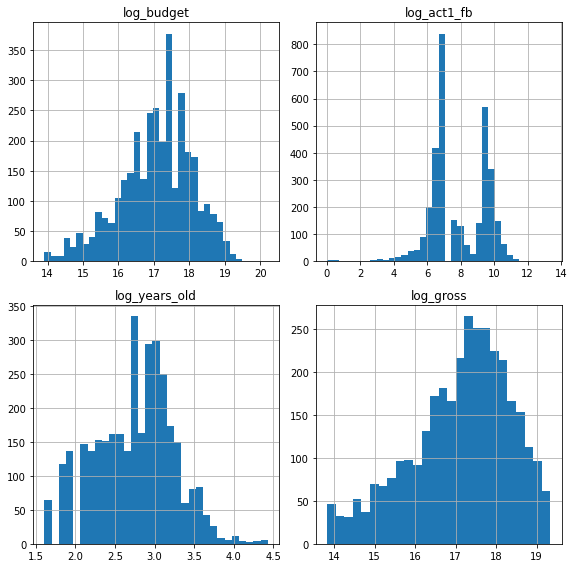

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
df3_log = df3[['log_budget', 'log_act1_fb', 'log_years_old', 'log_gross']]
df3_log.hist(bins='auto', ax=ax)
fig.tight_layout()

In [ ]:
outcome = 'gross'
x_cols = ['budget', 'years_old', 'act1_fb_likes', 'imdb_score']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     415.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.59e-291
Time:                        12:33:33   Log-Likelihood:                -63736.
No. Observations:                3364   AIC:                         1.275e+05
Df Residuals:                    3359   BIC:                         1.275e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.992e+07   4.54e+06     -8.798      0.000   -4.88e+07    -3.1e+07
budget            0.6912      0.018     38.042      0.000       0.656       0.727
years_old      5.777e+05   7.83e+04      7.377      0.000    4.24e+05    7.31e+05
act1_fb_likes   161.9157     46.556      3.478      0.001      70.634     253.197
imdb_score     7.745e+06   6.77e+05     11.436      0.000    6.42e+06    9.07e+06
==============================================================================
Omnibus:                      711.411   Durbin-Watson:                   1.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5671.075
Skew:                           0.782   Prob(JB):                         0.00
Kurtosis:                       9.165   Cond. No.                     3.69e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9cc81e3a58>,
      dtype=object)

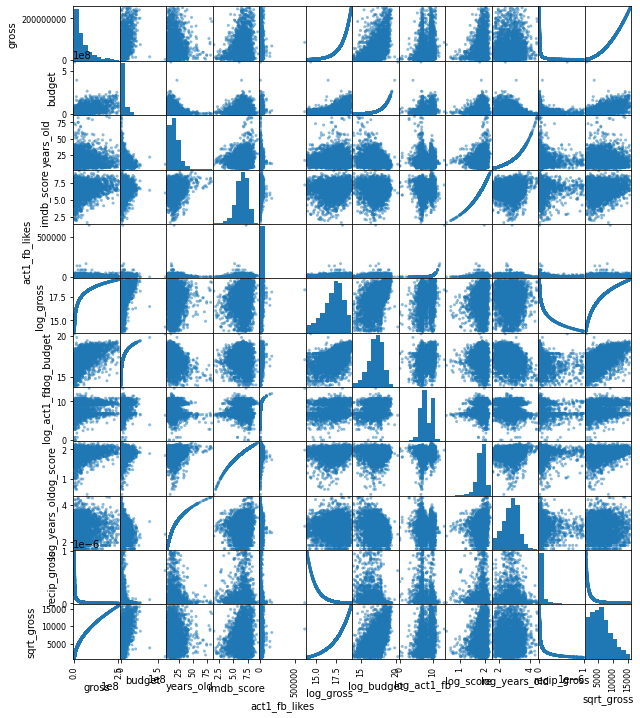

In [ ]:
pd.plotting.scatter_matrix(df3, figsize=(10,12))

In [ ]:
outcome = 'log_gross'
x_cols = ['budget', 'years_old', 'act1_fb_likes', 'imdb_score']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_gross   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     248.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.39e-187
Time:                        12:35:55   Log-Likelihood:                -5042.4
No. Observations:                3364   AIC:                         1.009e+04
Df Residuals:                    3359   BIC:                         1.013e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        15.6374      0.120    130.266      0.000      15.402      15.873
budget         1.431e-08   4.81e-10     29.770      0.000    1.34e-08    1.53e-08
years_old         0.0158      0.002      7.611      0.000       0.012       0.020
act1_fb_likes  6.256e-06   1.23e-06      5.079      0.000    3.84e-06    8.67e-06
imdb_score        0.0900      0.018      5.025      0.000       0.055       0.125
==============================================================================
Omnibus:                      595.681   Durbin-Watson:                   0.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1658.521
Skew:                          -0.937   Prob(JB):                         0.00
Kurtosis:                       5.884   Cond. No.                     3.69e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
xcol = ['budget', 'imdb_score', 'years_old', 'act1_fb_likes']
g = sns.FacetGrid(df3, col=xcol,  height=3.5)
g.map(sns.scatterplot,'log_gross')

ValueError: ignored

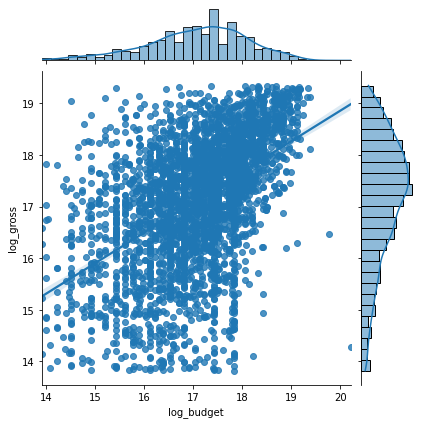

In [ ]:
sns.jointplot(x='log_budget', y='log_gross', data=df3, kind='reg')

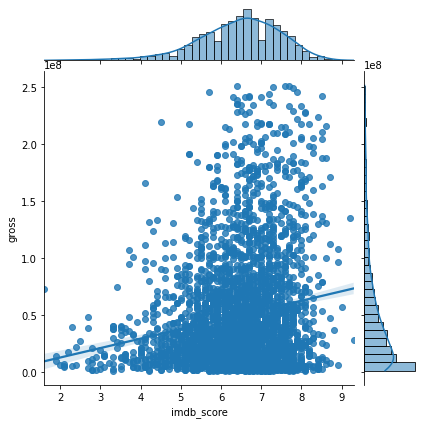

In [ ]:
sns.jointplot(x='imdb_score', y='gross', data=df3, kind='reg')

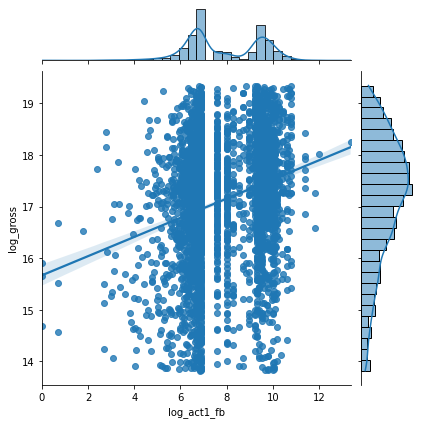

In [ ]:
sns.jointplot(x='log_act1_fb', y='log_gross', data=df3, kind='reg')

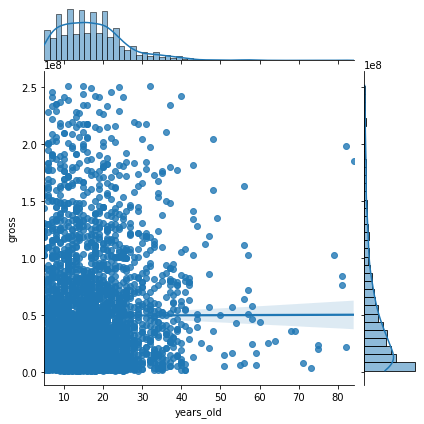

In [ ]:
sns.jointplot(x='years_old', y='gross', data=df3, kind='reg')

In [ ]:
df4 = df3.copy()

In [ ]:
imdb = df4.imdb_score
scaled_imdb = (imdb - min(imdb)) / (max(imdb) - min(imdb))
df4['scaled_imdb'] = scaled_imdb
act1 = df4.log_act1_fb
scaled_act1 = (act1 - np.mean(act1)) / np.sqrt(np.var(act1))
df4['scaled_act1'] = scaled_act1
df4.head()

,gross,budget,years_old,genre_0,imdb_score,act1_fb_likes,language,rating,log_gross,log_budget,log_act1_fb,log_score,log_years_old,recip_gross,sqrt_gross,scaled_imdb,scaled_act1
0,200074175.0,245000000.0,6.0,Action,6.8,11000.0,English,PG-13,19.114199,19.316769,9.305651,1.916923,1.791759,4.998146e-09,14144.757863,0.675325,0.882794
1,73058679.0,263700000.0,9.0,Action,6.6,640.0,English,PG-13,18.106773,19.390323,6.461468,1.887070,2.197225,1.368763e-08,8547.436984,0.649351,-0.836510
2,200807262.0,260000000.0,11.0,Adventure,7.8,799.0,English,PG,19.117856,19.376192,6.683361,2.054124,2.397895,4.979900e-09,14170.647903,0.805195,-0.702376
3,200069408.0,209000000.0,15.0,Action,6.1,18000.0,English,PG-13,19.114175,19.157845,9.798127,1.808289,2.708050,4.998265e-09,14144.589354,0.584416,1.180495
4,168368427.0,200000000.0,13.0,Action,6.7,451.0,English,PG-13,18.941665,19.113828,6.111467,1.902108,2.564949,5.939356e-09,12975.685993,0.662338,-1.048085


In [ ]:
df2 = df

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9cccdbf1d0>,
      dtype=object)

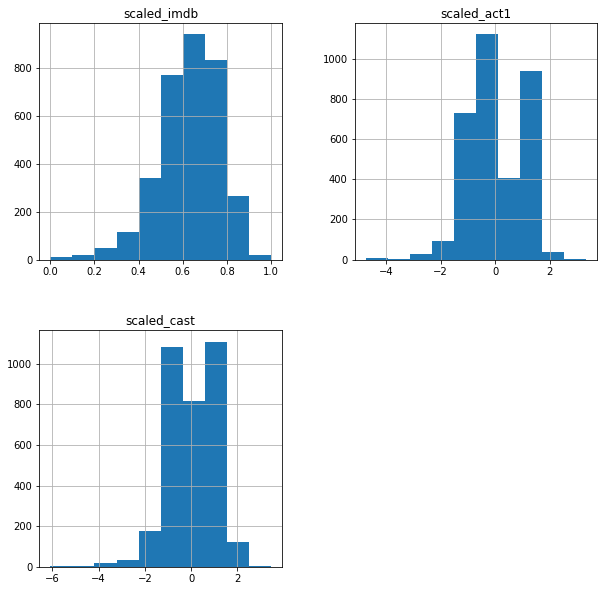

In [ ]:
scaled = df2[['scaled_imdb', 'scaled_act1', 'scaled_cast']]
scaled.hist(figsize=[10,10])

## Question 4a

Create the following variables:

- `years_old`: The number of years since the film was released.
- Dummy categories for each of the following ratings:
    - `G`
    - `PG`
    - `R`
    
Once you have those variables, create a summary output for the following OLS model:

`gross~cast_total_facebook_likes+budget+years_old+G+PG+R`

In [ ]:
# your answer here
df2.head()

,gross,budget,duration,years_old,title_year,genre_0,imdb_score,act1_fb_likes,cast_fb_likes,rating,log_gross,log_budget,log_act1_fb,log_cast_fb,log_years_old,log_score,recip_gross,scaled_imdb,scaled_act1,scaled_cast
1,309404152.0,0.336541,0.611589,1.030480,2007.0,Action,7.1,0.423633,0.420474,PG-13,19.550159,-1.089034,-0.858889,-0.866373,0.030024,1.960095,3.232019e-09,0.714286,-1.254592,-1.081031
2,200074175.0,0.337727,0.621550,1.714683,2015.0,Action,6.8,0.448305,0.446981,PG-13,19.114199,-1.085518,-0.802280,-0.805238,0.539228,1.916923,4.998146e-09,0.675325,-0.802098,-0.516907
5,73058679.0,0.337294,0.630629,1.270333,2012.0,Action,6.6,0.535947,0.495148,PG-13,18.106773,-1.086801,-0.623720,-0.702899,0.239279,1.887070,1.368763e-08,0.649351,0.625202,0.427439
6,336530303.0,0.337422,0.617528,1.030480,2007.0,Action,6.2,0.432689,0.421274,PG-13,19.634199,-1.086420,-0.837736,-0.864471,0.030024,1.824549,2.971501e-09,0.597403,-1.085511,-1.063482
7,200807262.0,0.337377,0.654802,1.143391,2010.0,Adventure,7.8,0.526421,0.492463,PG,19.117856,-1.086555,-0.641654,-0.708337,0.133998,2.054124,4.979900e-09,0.805195,0.481847,0.377256


In [ ]:
df3 = df2[['gross', 'budget', 'duration', 'years_old', 'genre_0', 'imdb_score', 'act1_fb_likes', 'cast_fb_likes', 'rating']]

In [ ]:
df3 = pd.get_dummies(df3, columns=['rating'])

In [ ]:
#df3 = pd.get_dummies(df3, columns=['genre_0'])

In [ ]:
df3.head()

,gross,budget,duration,years_old,genre_0,imdb_score,act1_fb_likes,cast_fb_likes,rating_G,rating_PG,rating_PG-13,rating_R,rating_unrated
1,309404152.0,0.336541,0.611589,1.030480,Action,7.1,0.423633,0.420474,0,0,1,0,0
2,200074175.0,0.337727,0.621550,1.714683,Action,6.8,0.448305,0.446981,0,0,1,0,0
5,73058679.0,0.337294,0.630629,1.270333,Action,6.6,0.535947,0.495148,0,0,1,0,0
6,336530303.0,0.337422,0.617528,1.030480,Action,6.2,0.432689,0.421274,0,0,1,0,0
7,200807262.0,0.337377,0.654802,1.143391,Adventure,7.8,0.526421,0.492463,0,1,0,0,0


In [ ]:
mlr_model = ols(formula='gross~cast_fb_likes+budget+years_old+rating_G+rating_PG+rating_R', data=df3).fit()
mlr_model.summary()

OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     142.1
Date:                Sun, 29 Nov 2020   Prob (F-statistic):          7.32e-162
Time:                        14:56:46   Log-Likelihood:                -68516.
No. Observations:                3559   AIC:                         1.370e+05
Df Residuals:                    3552   BIC:                         1.371e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.747e+08   3.31e+07     23.399      0.000     7.1e+08     8.4e+08
cast_fb_likes -3.689e+07   1.14e+07     -3.242      0.001   -5.92e+07   -1.46e+07
budget        -1.999e+09   9.42e+07    -21.214      0.000   -2.18e+09   -1.81e+09
years_old      7.978e+06   3.58e+06      2.229      0.026    9.61e+05     1.5e+07
rating_G       1.701e+07   6.11e+06      2.786      0.005    5.04e+06     2.9e+07
rating_PG      1.123e+07   2.79e+06      4.031      0.000    5.77e+06    1.67e+07
rating_R      -1.593e+07   2.12e+06     -7.502      0.000   -2.01e+07   -1.18e+07
==============================================================================
Omnibus:                     1457.270   Durbin-Watson:                   1.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6349.820
Skew:                           1.987   Prob(JB):                         0.00
Kurtosis:                       8.199   Cond. No.                         176.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Question 4b

Below is the summary output you should have gotten above. Identify any key takeaways from it.
- How ‘good’ is this model?
- Which features help to explain the variance in the target variable? 
    - Which do not? 


# <img src="ols_summary.png" style="withd:300px;">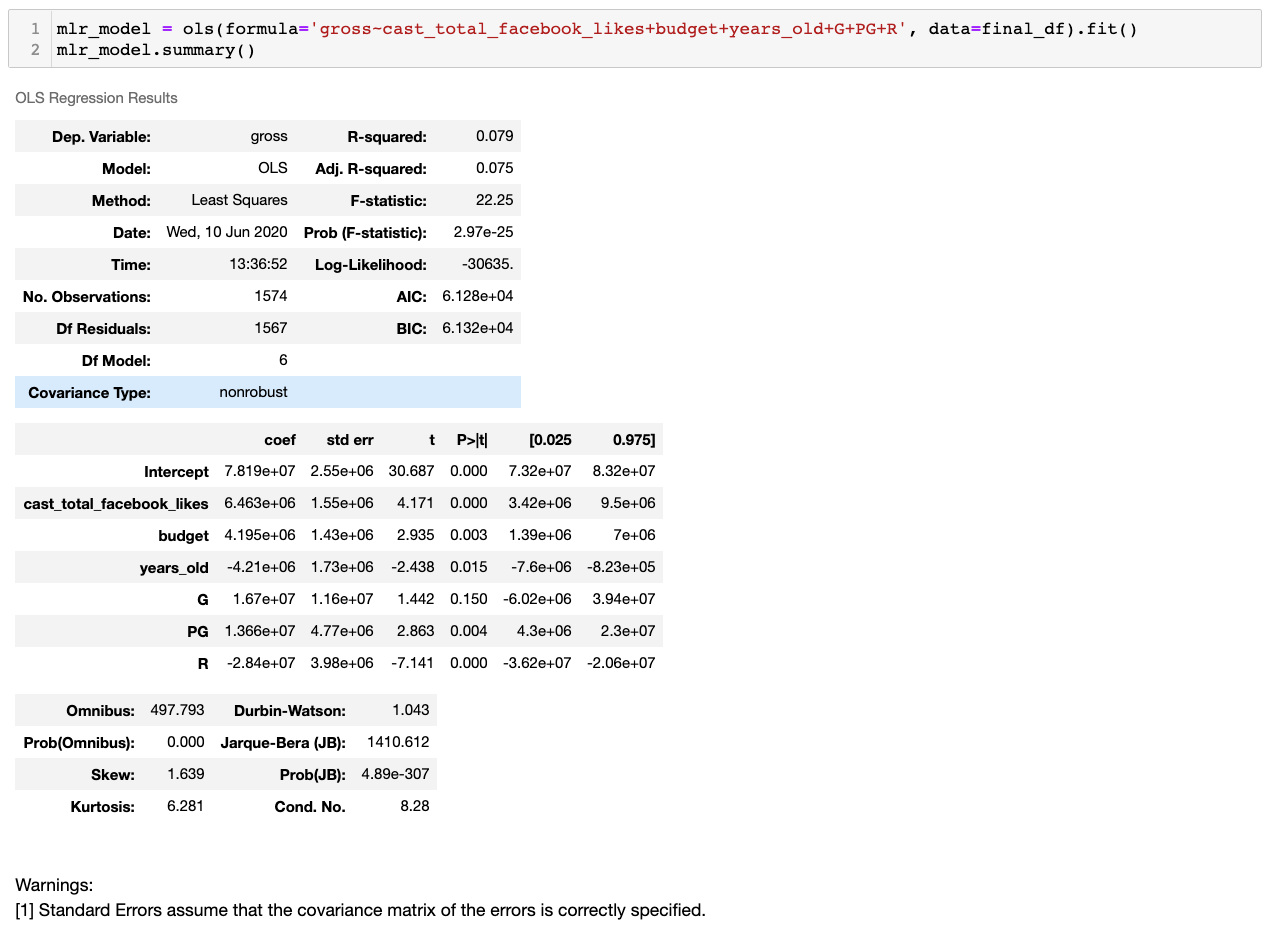

In [ ]:
# your answer here


## Question 5

**Bayes Theorem**

An advertising executive is studying television viewing habits of married men and women during prime time hours. Based on the past viewing records he has determined that during prime time wives are watching television 60% of the time. It has also been determined that when the wife is watching television, 40% of the time the husband is also watching. When the wife is not watching the television, 30% of the time the husband is watching the television. Find the probability that if the husband is watching the television, the wife is also watching the television.

Given:<br />
P(W) = 60% so P(NW) = 40%<br />
P(W) = P(W|H) + P(W|NH)<br />
P(H and W) = 40%<br />
P(H and NW) = 30%<br />

<table>         
<tr>
<th></th>
<th>W(60%)</th>      
<th>NW(40%)</th>
</tr>
<tr>
<th>H</th>
<th>40%=0.24</th>    
<th>30%=0.12</th>
</tr>
<tr>
<th>NH</th>
<th>60%=0.36</th>
<th>70%=0.28</th>
</tr>
</table>

P(W|H) = 0.24

## Question 6

Explain what a Type I error is and how it relates to the significance level when doing a statistical test. 

## Alpha and Type I Errors

- chance of accidentally rejecting a null hypothesis when it should not have been rejected. 
- Having a positive test for cancer or disease when you are negative is an example of a type I error.
- confidence level is inversely related to probability of type I error: when you increase one, you decrease the other.

